In [1]:
# Dependencies
import requests as req
import json
import zipcodes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import http.client
from datetime import datetime
import time as time
import zip_functions as zf

In [2]:
# get latitude and longitude of target zipcode
target_zip = input("Which zipcode would you like to score? ")
y = True

while y == True:
    if len(zipcodes.matching(target_zip)) == 0:
        print("That is not a valid zip code")
        target_zip = input("Please try a new zipcode ")
    else:
        y = False

lat = zipcodes.matching(target_zip)[0]["lat"]
lng = zipcodes.matching(target_zip)[0]["long"]

Which zipcode would you like to score? 22314


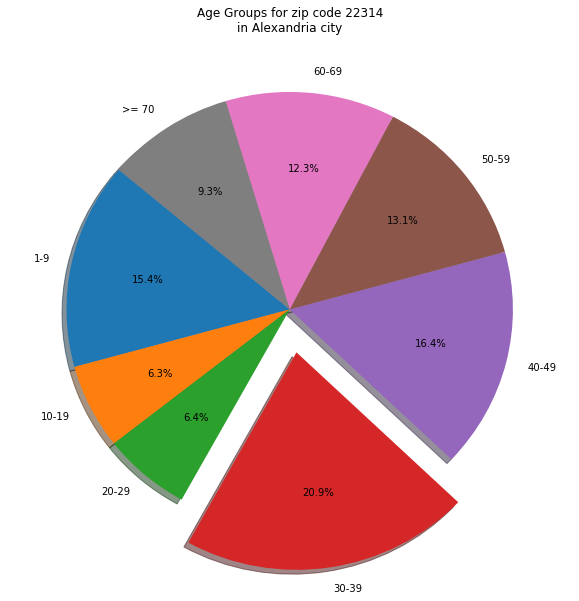

In [3]:
resp = zf.get_community_data(target_zip)
zf.age_demographics_zip(resp,target_zip)

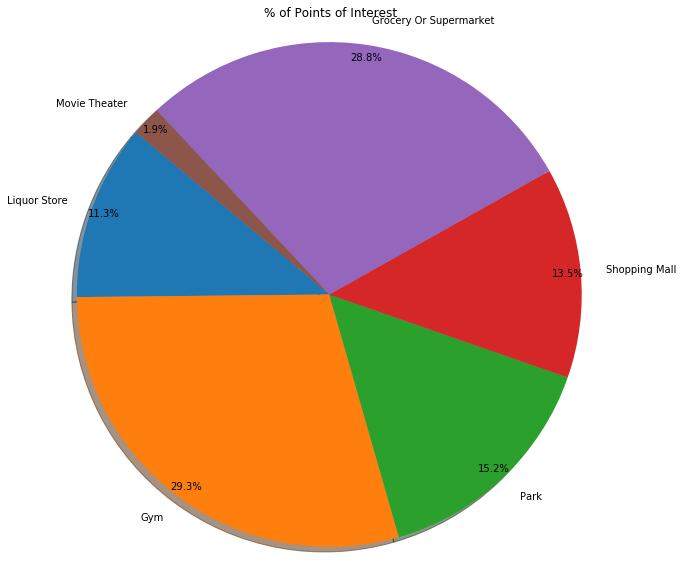

In [4]:
# run the pie_plot function to graph points of interest
# poi is the return dictionary of results from the barfinder function
poi = zf.barfinder(lat,lng)
zf.pie_plot(poi)


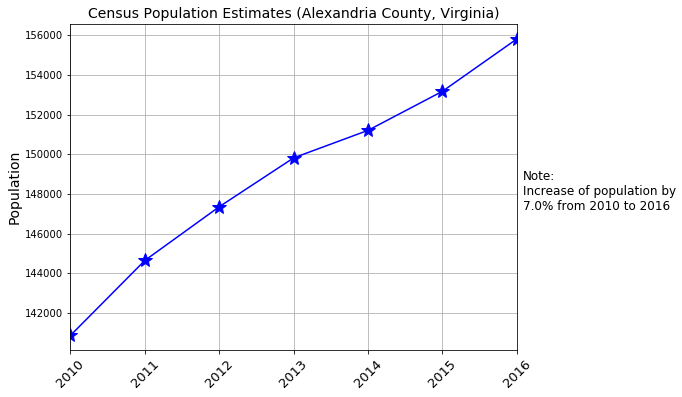

,Population,Years,Difference,Percent Change
0,140874,2010,0,0.00
1,144651,2011,3777,2.68
2,147357,2012,2706,1.87
3,149819,2013,2462,1.67
4,151206,2014,1387,0.93
5,153172,2015,1966,1.30
6,155810,2016,2638,1.72


In [5]:
# Use the census data to determine population growth for zip codes
pop_est,county_name,state_name = zf.cen_block_query(lat,lng)
zf.census_plot(pop_est,county_name,state_name)
zf.population_df_generator(pop_est)